In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sklm
import sklearn.preprocessing as skp
import sklearn.metrics as skmetric
%matplotlib inline

In [2]:
df_train = pd.read_csv('AllTrain.csv', encoding='cp1252')

C:\Users\Karthik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train.head()

,id,status,sector,posted_date,funded_date,loan_amount,partner_id,bonus_credit_eligibility,lender_count,activity,...,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,lgAmount,funded_or_not
0,144599,expired,Services,2009-11-01 07:00:35,NaN,2750,73,False,24,Services,...,0.0,0.0,0.0,0.0,0.0,1.75,0.00,0.00,7.919356,1
1,198636,inactive_expired,Food,NaN,NaN,550,20,False,0,Food Production/Sales,...,0.0,0.0,0.0,0.0,0.0,0.00,3.08,3.08,6.309918,1
2,395411,inactive_expired,Retail,NaN,NaN,375,133,False,0,Mobile Phones,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,5.926926,1
3,522626,deleted,Retail,NaN,NaN,575,222,True,0,Retail,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,6.354370,1
4,744270,inactive_expired,Food,NaN,NaN,1450,104,False,0,Food,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,7.279319,1


In [4]:
df_train['activity'].nunique()

149

In [6]:
df_train['sector'].nunique()

15

In [19]:
df1 = df_train[['lgAmount', 'repayment_term', 'funded_or_not']].dropna()
X_train1 = df1[['lgAmount', 'repayment_term']]
y_train1 = df1['funded_or_not']

In [20]:
model1 = sklm.LogisticRegression()
model1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
pred1 = model1.predict(X_train1)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
model1.coef_

array([[ 0.58640897,  0.02461695]])

In [26]:
probs = model1.predict_proba(X_train1)
probs

array([[ 0.92477167,  0.07522833],
       [ 0.89056965,  0.10943035],
       [ 0.9521717 ,  0.0478283 ],
       ..., 
       [ 0.97537809,  0.02462191],
       [ 0.96822556,  0.03177444],
       [ 0.9702831 ,  0.0297169 ]])

In [27]:
unfunded_prob = probs[:, 1]

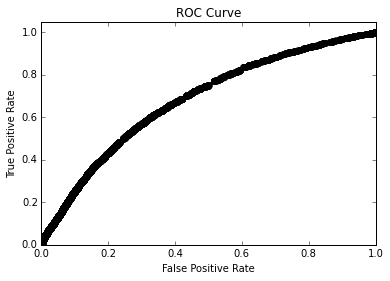

In [28]:
fpr, tpr, thresholds = skmetric.roc_curve(y_train1, unfunded_prob,)

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [30]:
skmetric.roc_auc_score(y_true=y_train1==1, y_score=unfunded_prob,)

0.68049084520480885

In [32]:
df2 = df_train[['lgAmount', 'repayment_term', 'sector', 'repayment_interval', 'video_present', 'funded_or_not']].dropna()
X_train2 = df2[['lgAmount', 'repayment_term', 'sector', 'repayment_interval', 'video_present']]
y_train2 = df2['funded_or_not']
X_train2 = pd.get_dummies(X_train2)

In [33]:
model2 = sklm.LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
model2.coef_

array([[ 0.61710059,  0.0277334 , -0.04429014, -0.16974597, -1.3391271 ,
         0.03944253, -0.5218779 , -1.33512036, -0.91602036, -0.12279216,
        -0.5466123 ,  0.71397516, -1.30480057,  0.5535807 ,  0.1852611 ,
        -0.22944244,  0.21367169, -0.5015968 , -1.36721432, -1.9902536 ,
        -1.92373685]])

In [35]:
probs2 = model2.predict_proba(X_train2)
probs2

array([[ 0.90977674,  0.09022326],
       [ 0.91096521,  0.08903479],
       [ 0.95916586,  0.04083414],
       ..., 
       [ 0.97967031,  0.02032969],
       [ 0.97333009,  0.02666991],
       [ 0.96648971,  0.03351029]])

In [36]:
unfunded_prob2 = probs2[:, 1]

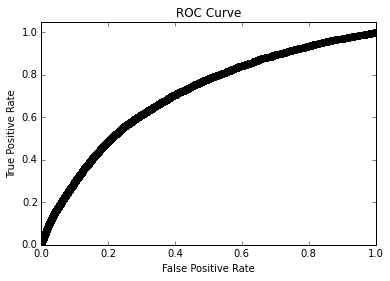

In [37]:
fpr, tpr, thresholds = skmetric.roc_curve(y_train2, unfunded_prob2,)

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [38]:
skmetric.roc_auc_score(y_true=y_train2==1, y_score=unfunded_prob2,)

0.70524609406853678

In [52]:
df3 = df_train[['lgAmount', 'repayment_term', 'sector', 'repayment_interval', 'video_present', 'funded_or_not']].dropna()
X_train3 = df3[['sector', 'repayment_interval', 'video_present']]
y_train3 = df3['funded_or_not']
X_train3 = pd.get_dummies(X_train3)
model3 = sklm.LogisticRegression()
model3.fit(X_train3, y_train3)
probs3 = model3.predict_proba(X_train3)
unfunded_prob3 = probs3[:, 1]
skmetric.roc_auc_score(y_true=y_train3==1, y_score=unfunded_prob3,)

0.59760904573135543

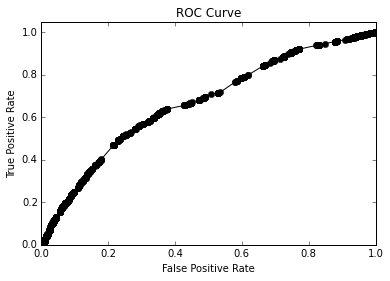

In [40]:
fpr, tpr, thresholds = skmetric.roc_curve(y_train3, unfunded_prob3,)

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [41]:
df4 = df_train[['video_present', 'funded_or_not']].dropna()
X_train4 = df4[['video_present']]
y_train4 = df4['funded_or_not']
X_train4 = pd.get_dummies(X_train4)
model4 = sklm.LogisticRegression()
model4.fit(X_train4, y_train4)
probs4 = model4.predict_proba(X_train4)
unfunded_prob4 = probs4[:, 1]
skmetric.roc_auc_score(y_true=y_train4==1, y_score=unfunded_prob4,)

0.50019980159682931

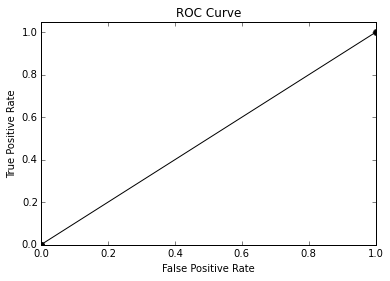

In [43]:
fpr, tpr, thresholds = skmetric.roc_curve(y_train4, unfunded_prob4,)

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')